# ALFRED

In [1]:
# import external modules
import sys
import os
import numpy as np
from matplotlib import rc
# add "coreutils" directories to path
sys.path.append(os.path.abspath('../../../../../'))
from coreutils.core.Core import Core
from coreutils.core.plot import RadialGeomPlot, AxialGeomPlot
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200  # set dpi for increasing plot rendering quality

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
rc('text', usetex=True)

# input file name and location
try:
    os.chdir("ALFRED")
except FileNotFoundError:  # patch for Linux systems
    pass
filepath = os.path.join("input.json")
alfred = Core(filepath)

SERPENT Serpent 2.1.30 found in C:\Users\39346\Documents\mycodes\coreutils\docs\NEdata\ALFRED-FC_Tf_1073_Tc_1073_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.29 found in C:\Users\39346\Documents\mycodes\coreutils\docs\NEdata\ALFRED-FC_Tf_1073_Tc_673_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.29 found in C:\Users\39346\Documents\mycodes\coreutils\docs\NEdata\ALFRED-FC_Tf_1473_Tc_1073_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.30 found in C:\Users\39346\Documents\mycodes\coreutils\docs\NEdata\ALFRED-FC_Tf_1473_Tc_1473_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2

The content of the "input.json" file is the following:

[0, 5.4, 9.0]


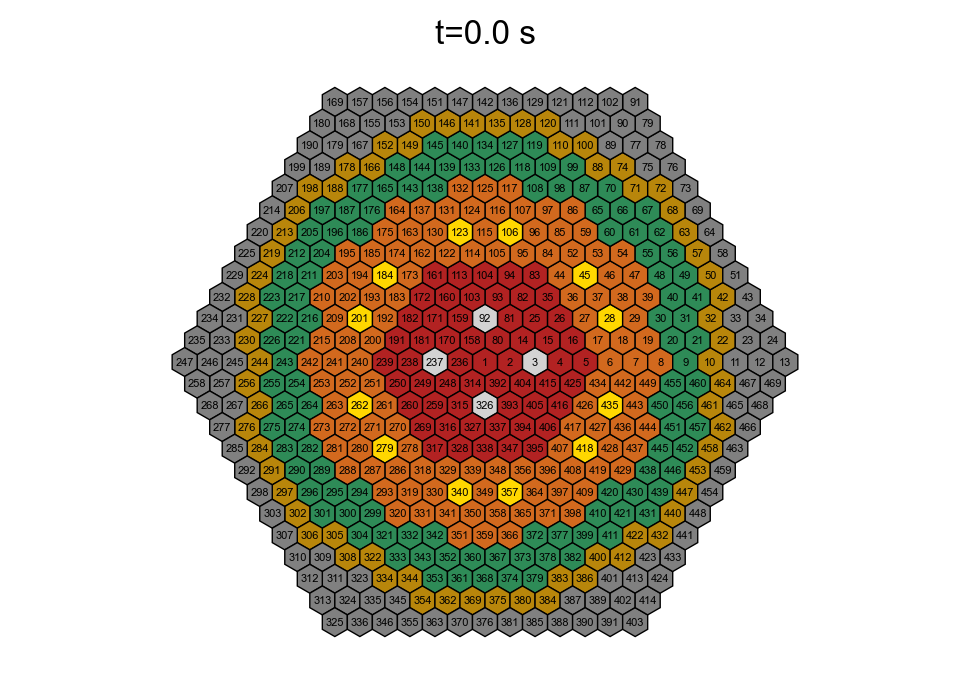

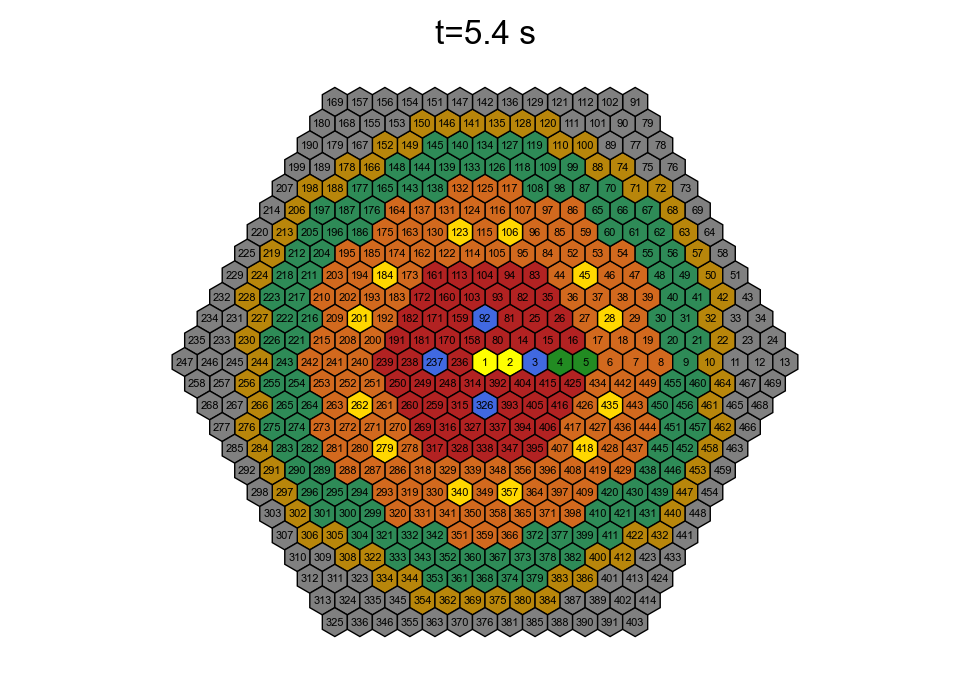

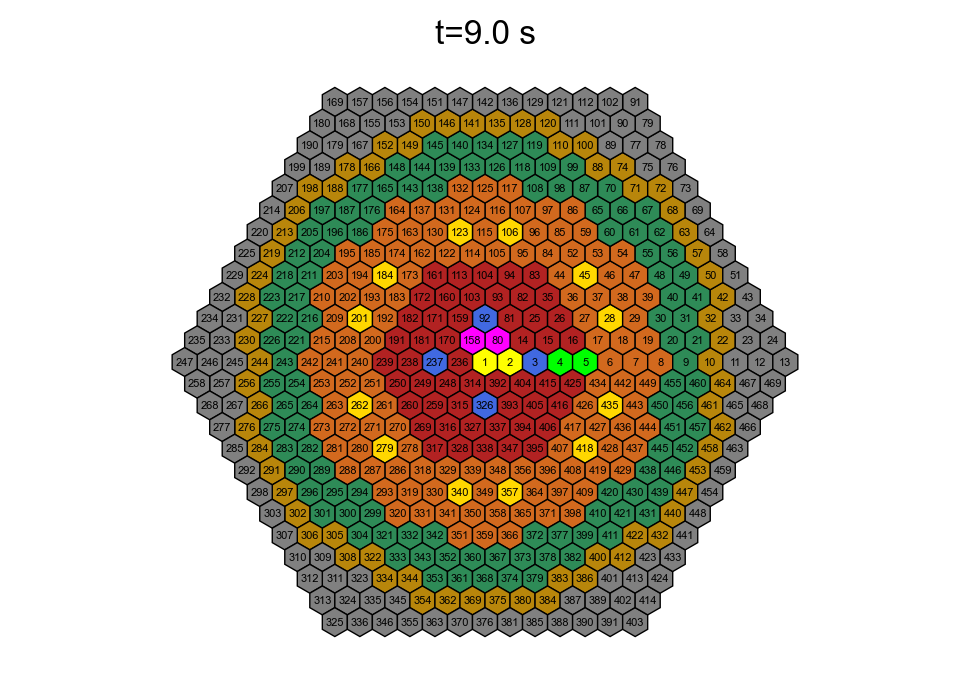

In [2]:
# plot core radial configuration
print(alfred.NEtime)
for t in alfred.NEtime:
    RadialGeomPlot(alfred, time=t, label=True, fren=True, whichconf="NEconfig", title="t=%.1f s" % t)

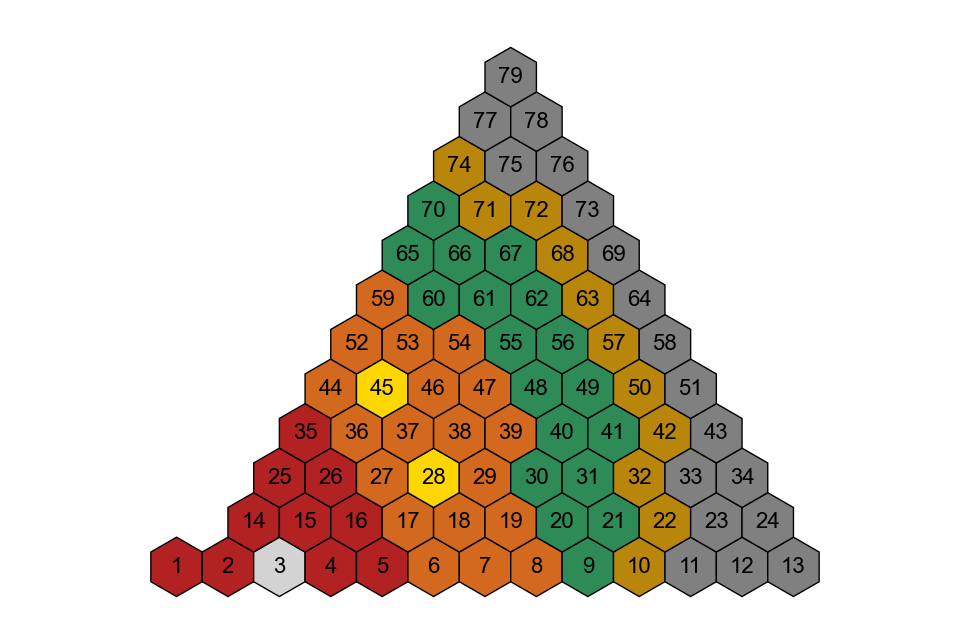

In [3]:
# Do you want to save some core assemblies with the Serpent numbering?
ass = np.arange(1,80)
RadialGeomPlot(alfred, which=ass, time=0, label=True, figname="alfred_t0_sextI_serpnum.png",
           fren=True, fontsize=8, whichconf="NEconfig")

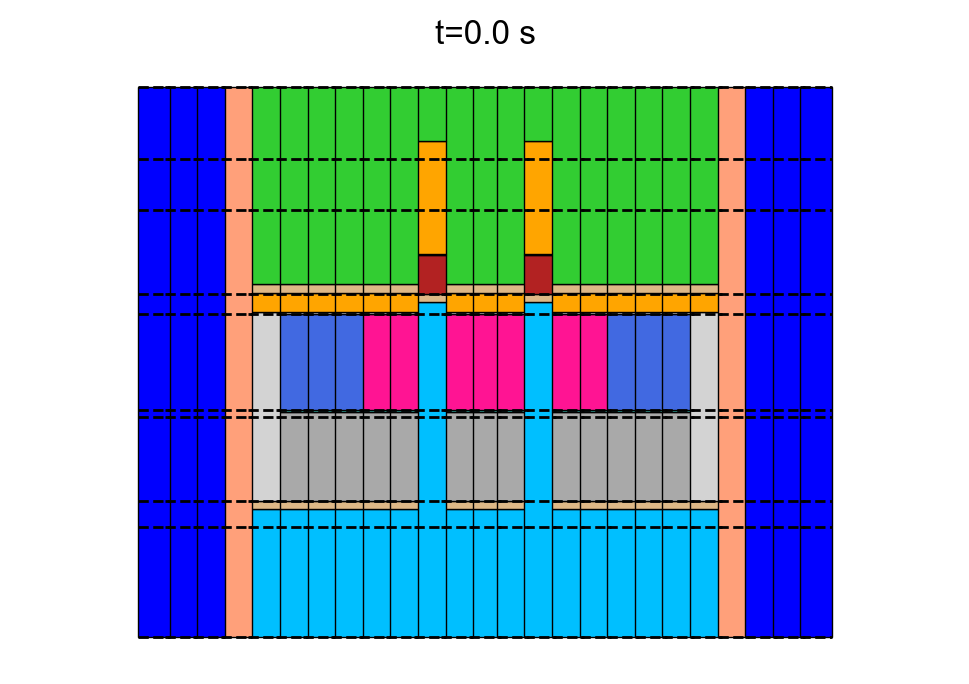

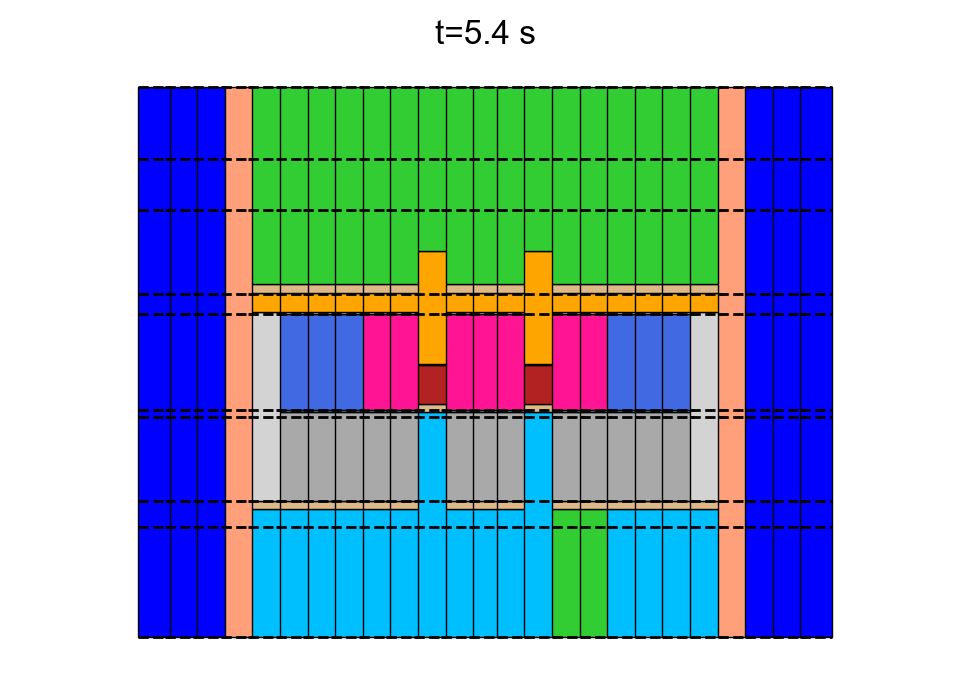

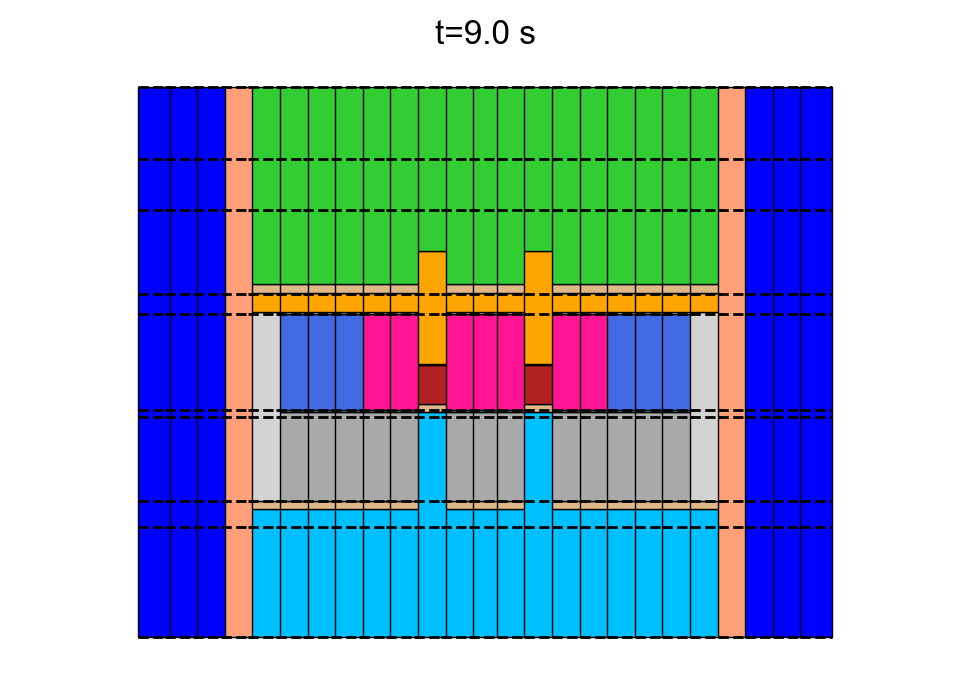

In [4]:
# select assembly numbers (FRENETIC numeration) to be plotted
ass = np.concatenate([np.arange(247, 235, -1), np.arange(1, 14)])

# plot core Axial configuration
for t in alfred.NEtime:
    AxialGeomPlot(alfred, ass, time=t, fren=True, zcuts=True, title="t=%.1f s" % t)

OrderedDict([(1, 'IF'), (2, 'OF'), (3, 'CR'), (4, 'SR'), (5, 'DR'), (6, 'BA'), (7, 'EL'), (8, 'SRt5.4z-68'), (9, 'IF_t5.4_p1'), (10, 'IF_t5.4_p2'), (11, 'IF_t9_p1'), (12, 'IF_t9_p2')])


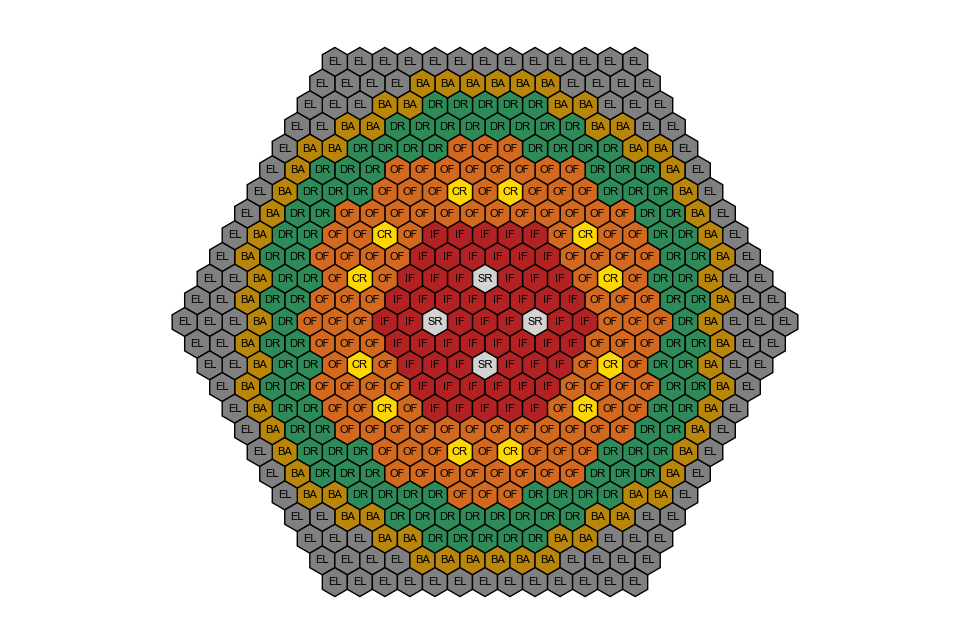

In [5]:
# Do you want custom labels? Just define them using a python dictionary
asslabel = alfred.NEassemblytypes
print(asslabel)
# plot with customised assembly labels
RadialGeomPlot(alfred, label=True, dictname=asslabel, time=0, fren=True, whichconf="NEconfig")  # specify figname to save the figure

In [6]:
# Do you want to print it to a file? You can do it
# MODE 1 (Serpent-style)
alfred.writecorelattice(fname="serpent_lattice.txt", serpheader=True, whichconf="NEconfig")
# print file content
f = open('serpent_lattice.txt', 'r')
file = f.read()
print(file)

# MODE 2 (core flattened in a 1D array)
alfred.writecorelattice(flatten=True)  # file saved with default name "coremap.txt"

lat core  3 0.0 0.0 32 32 17.1
VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV
VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV
VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV
VV VV VV VV VV VV VV VV VV VV VV VV VV VV VV EL EL EL EL EL EL EL EL EL EL EL EL EL VV VV VV VV
VV VV VV VV VV VV VV VV VV VV VV VV VV VV EL EL EL EL BA BA BA BA BA BA EL EL EL EL VV VV VV VV
VV VV VV VV VV VV VV VV VV VV VV VV VV EL EL EL BA BA DR DR DR DR DR BA BA EL EL EL VV VV VV VV
VV VV VV VV VV VV VV VV VV VV VV VV EL EL BA BA DR DR DR DR DR DR DR DR BA BA EL EL VV VV VV VV
VV VV VV VV VV VV VV VV VV VV VV EL BA BA DR DR DR DR OF OF OF DR DR DR DR BA BA EL VV VV VV VV
VV VV VV VV VV VV VV VV VV VV EL BA DR DR DR OF OF OF OF OF OF OF OF DR DR DR BA EL VV VV VV VV
VV VV VV VV VV VV VV VV VV EL BA DR DR DR OF OF OF CR OF CR OF OF OF DR DR DR BA EL VV VV VV VV
VV VV VV 

In [7]:
# Do you want to print assembly type and center coordinates?
alfred.writecentermap()  # type, x [cm], y [cm]
# print file content
f = open('centermap.txt', 'r')
file = f.read()
print(file[0:100])

496 0.000000 0.000000
528 17.100000 0.000000
560 34.200000 0.000000
592 51.300000 0.000000
624 68.40


Now, let's plot the Cooling Zone configurations. Please note that the `AxialGeomPlot` is available only for NEutronic configurations.

[0, 7.6]


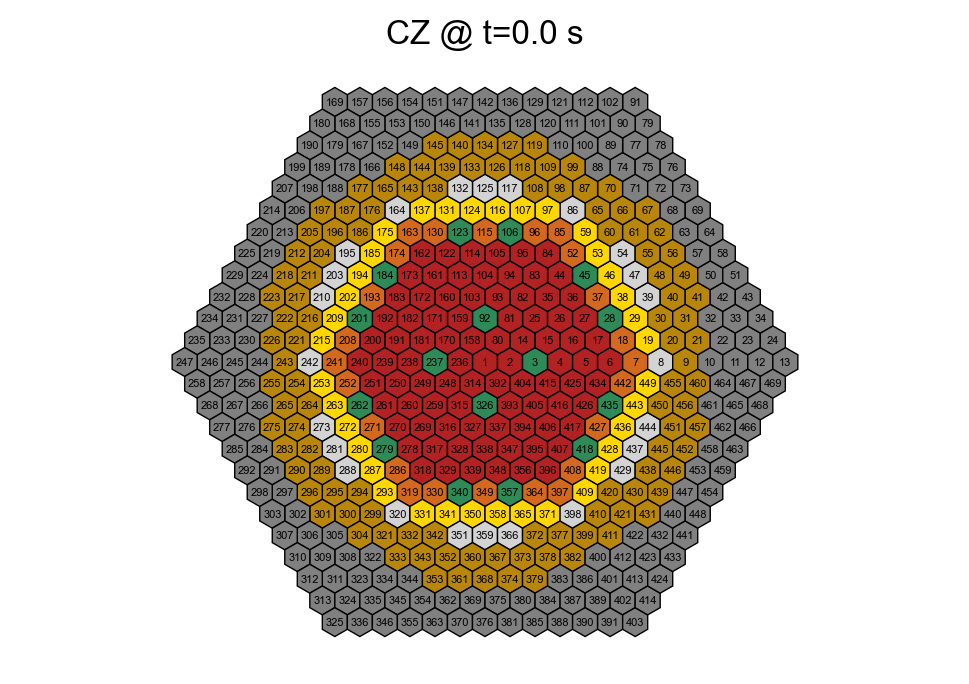

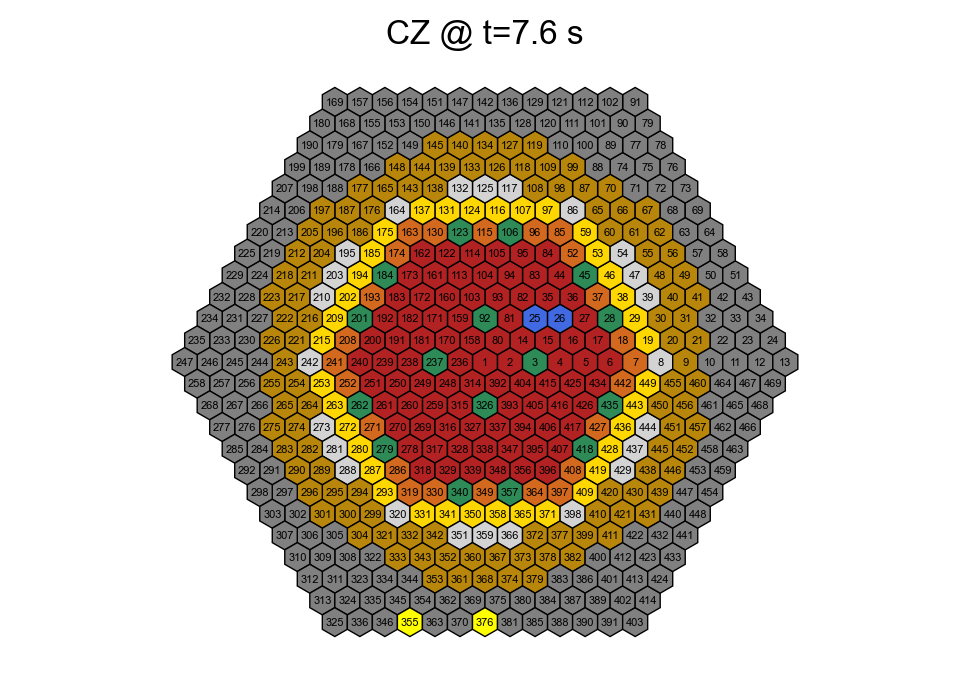

In [8]:
# plot core radial configuration
print(alfred.CZtime)
for t in alfred.CZtime:
    RadialGeomPlot(alfred, time=t, label=True, fren=True, whichconf="CZconfig", title="CZ @ t=%.1f s" % t)

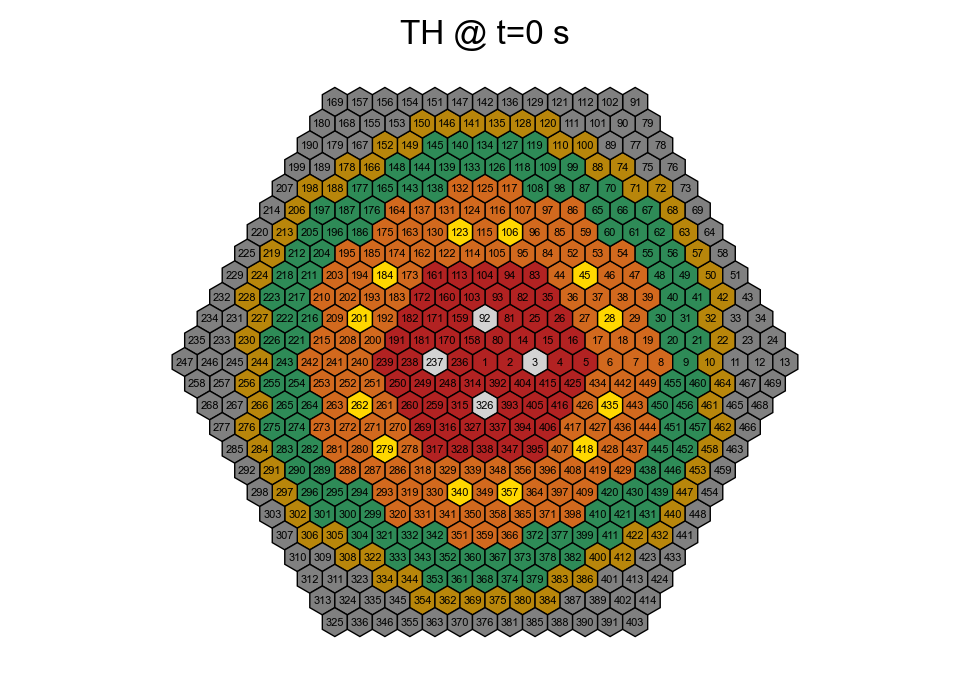

In [9]:
# plot core radial configuration
RadialGeomPlot(alfred, label=True, fren=True, whichconf="THconfig", title="TH @ t=0 s")